### HW04 USHAKOV

Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [41]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # функция разделения массива данных на тренировочные и тестовые
from sklearn.model_selection import StratifiedKFold # функция разделения массива данных на тренировочные и тестовые


from sklearn.datasets import load_boston #загрузка DataSet Boston

from sklearn.linear_model import LinearRegression # загрузка класс linear regression
from sklearn.linear_model import Lasso # загрузка класс linear regression
from sklearn.linear_model import Ridge # загрузка класс linear regression

from sklearn.metrics import mean_squared_error # среднеквадратичное отклонение
from sklearn.metrics import mean_absolute_error # среднее абсолютное отклонение
from sklearn.metrics import r2_score # Метрика R^2

from sklearn.preprocessing import StandardScaler #класс для стандартизации признаков

In [2]:
#boston = skl.datasets.load_boston()
boston = load_boston()
print(boston.DESCR)

data = boston.data
target = boston.target
feature_names = boston.feature_names

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns = ['price'])
pd.concat([X, y], axis=1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
check_test = pd.DataFrame({'y_test':y_test['price'], 'y_pred':y_pred.flatten()})
check_test['error'] = check_test['y_test'] - check_test['y_pred']

print('среднеквадратичное отклонение:', mean_squared_error(check_test['y_test'], check_test['y_pred']))
print('среднее абсолютное отклонение:', mean_absolute_error(check_test['y_test'], check_test['y_pred']))
print('R2 отклонение:', r2_score(check_test['y_test'], check_test['y_pred']))

среднеквадратичное отклонение: 21.517444231176995
среднее абсолютное отклонение: 3.1627098714573783
R2 отклонение: 0.711226005748496


<BarContainer object of 13 artists>

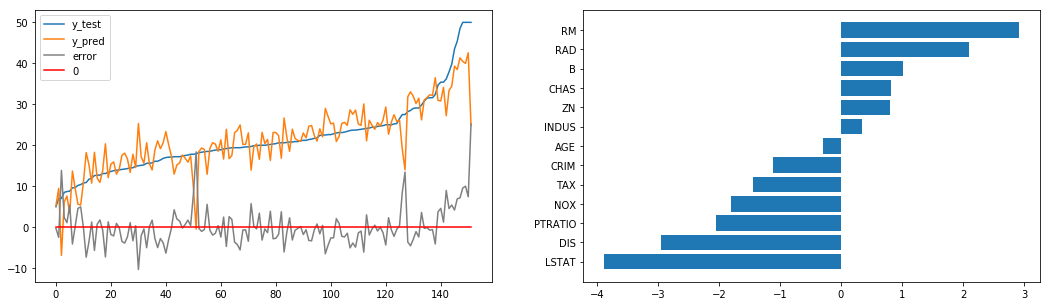

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 5)

ax[0].plot(list(range(len(check_test))), check_test.sort_values(by='y_test')['y_test'], label='y_test')
ax[0].plot(list(range(len(check_test))), check_test.sort_values(by='y_test')['y_pred'], label='y_pred')
ax[0].plot(list(range(len(check_test))), check_test.sort_values(by='y_test')['error'], label='error', color='grey')
ax[0].plot(list(range(len(check_test))), [0 for i in range(len(check_test))], label='0', color='red')
ax[0].legend()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

model = pd.DataFrame({'Features': X_test.columns, 'Coef':lr.coef_.flatten()})


ax[1].barh(model.sort_values(by='Coef')['Features'], model.sort_values(by='Coef')['Coef'])


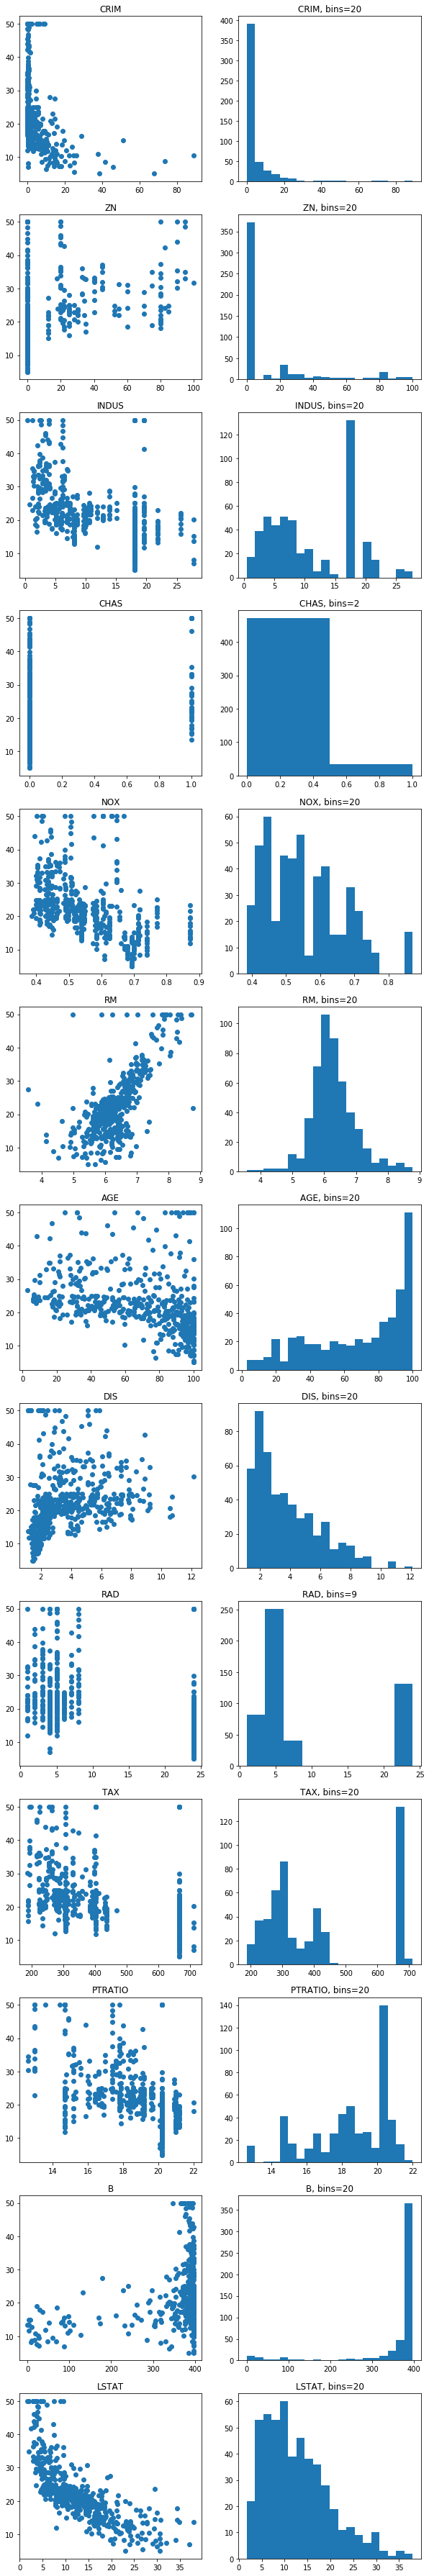

In [6]:
fig, ax = plt.subplots(nrows=len(feature_names), ncols=2)
fig.set_size_inches(10, len(feature_names)*5)
for i in range(len(feature_names)):
    ax[i, 0].scatter(X[feature_names[i]], y['price'])
    ax[i, 1].hist(X[feature_names[i]], bins = 20 if X[feature_names[i]].nunique() > 20 else X[feature_names[i]].nunique())
    ax[i, 0].set_title(feature_names[i])
    ax[i, 1].set_title(feature_names[i] + ', bins=' + str(20 if X[feature_names[i]].nunique() > 20 else X[feature_names[i]].nunique()))

In [7]:
feats = list(model.loc[abs(model['Coef'])>0.5, 'Features'])
feats

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [8]:
def check_model_r2(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:,feats], y_train)
    y_pred = model.predict(X_test.loc[:,feats])
    return r2_score(y_test, y_pred)

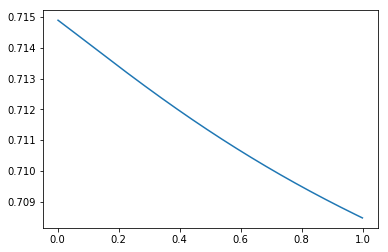

In [62]:
test_size_check = list()
for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    test_size_check.append([i/1000, check_model_r2 (X_train, y_train, X_test, y_test, feats, Ridge(alpha=i/1000))])
plt.plot([i[0] for i in test_size_check], [i[1] for i in test_size_check])

Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, 
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, 
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

* Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

* Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже 
знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.

Для этого датасета мы будем решать задачу классификации - будем определять, 
какие из транзакциции по кредитной карте являются мошенническими.

Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),
так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15], 
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100), 
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом, 
полученным на тренировочных данных, используя в качестве аргументов
массивы y_test и y_pred_proba.


*Дополнительные задания:
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.